In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [27]:
df = pd.read_csv('Wine.csv')
df.head(8)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Customer_Segment', axis=1).values,df['Customer_Segment'].values,test_size=0.2, random_state = 0)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=2)

In [34]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test) #from same distribution we donot need to fit for X_test
explained_variance = pca.explained_variance_ratio_
print(explained_variance) #when run 2 times it gives [0.65627164 0.34372836] ie 65% of 0.36 data

[0.36884109 0.19318394]


## x1 = 0.36884109      x2 = 0.19318394 

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

In [37]:
pd.DataFrame(data=list(zip(y_test,y_pred)),columns=['y','y-hat']).head(8)

,y,y-hat
0,1,1
1,3,3
2,2,2
3,1,1
4,2,2
5,2,1
6,1,1
7,3,3


In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

In [40]:
from mlxtend.plotting import plot_decision_regions

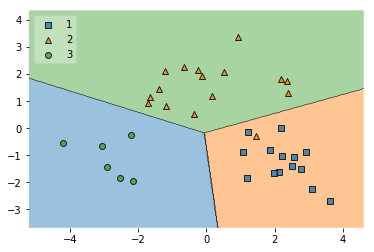

In [41]:
plot_decision_regions(X_test, y_test, clf=lg,legend=2)

KPCA

In [42]:
from sklearn.decomposition import KernelPCA

In [43]:
kpca = KernelPCA(n_components=2, kernel='rbf')
X_train=kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance) #when run 2 

[0.36884109 0.19318394]


In [44]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

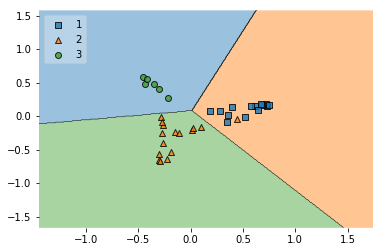

In [46]:
plot_decision_regions(X_test, y_test, clf=lg,legend=2)